In [1]:
import h5py
import PIL
import matplotlib.pyplot as plt
import numpy as np

train_path = '/home/zydq/Datasets/LCZ/training.h5'
vali_path = '/home/zydq/Datasets/LCZ/validation.h5'

/home/zydq/environments/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_h5 = h5py.File(train_path, 'r')
vali_h5 = h5py.File(vali_path, 'r')
label_names = ['LCZ 1:  Compact high-rise', 'LCZ 2:  Compact mid-rise', 'LCZ 3:  Compact low-rise',
               'LCZ 4:  Open high-rise', 'LCZ 5:  Open mid-rise', 'LCZ 6:  Open low-rise', 
               'LCZ 7:  Lightweight low-rise', 'LCZ 8:  Large low-rise', 'LCZ 9:  Sparsely built',
               'LCZ 10:  Heavy industry', 'LCZ A:  Dense trees', 'LCZ B:  Scattered trees', 
               'LCZ C:  Bush, scrub', 'LCZ D:  Low plants', 'LCZ E:  Bare rock or paved',
               'LCZ F:  Bare soil or sand',  'LCZ G:  Water']

In [518]:
def view_data(source, num):
    # lee
    VH_LEE_IN = source['sen1'][num,:,:,4] 
    VH_LEE_A = np.sqrt(VH_LEE_IN)
    VV_LEE_IN = source['sen1'][num,:,:,5] 
    VV_LEE_A = np.sqrt(VV_LEE_IN)
    
    Rc = source['sen1'][num,:,:,6] 
    
    # lee VV +- VH 第一种算法
    VV_VH_LEE_A = np.sqrt(VH_LEE_IN + VV_LEE_IN + 2 * Rc) / 2 
    VV_M_VH_LEE_A = np.sqrt(VH_LEE_IN + VV_LEE_IN - 2 * Rc) / 2
    
    RGB = np.concatenate([source['sen2'][num,:,:, [2]], 
                          source['sen2'][num,:,:, [1]],  
                          source['sen2'][num,:,:, [0]]], -1) 

    plt.figure(figsize=(10,5))
    
    # 1-exp(-x)
    plt.subplot(251)
    plt.imshow(1-np.exp(-np.sqrt(2)*VH_LEE_A), cmap=plt.cm.get_cmap('gray'))
    plt.subplot(252)
    plt.imshow(1-np.exp(-VV_LEE_A), cmap=plt.cm.get_cmap('gray'))
    plt.subplot(253)
    plt.imshow(1-np.exp(-VV_VH_LEE_A), cmap=plt.cm.get_cmap('gray'))
    plt.subplot(254)
    plt.imshow(1-np.exp(-VV_M_VH_LEE_A), cmap=plt.cm.get_cmap('gray'))  
    # 10 logx
    plt.subplot(256)
    plt.imshow(10*np.log10(2 * VH_LEE_A**2), cmap=plt.cm.get_cmap('gray'))
    plt.subplot(257)
    plt.imshow(10*np.log10(VV_LEE_A**2), cmap=plt.cm.get_cmap('gray'))
    plt.subplot(258)
    plt.imshow(10*np.log10(VV_VH_LEE_A**2), cmap=plt.cm.get_cmap('gray'))
    plt.subplot(259)
    plt.imshow(10*np.log10(VV_M_VH_LEE_A**2), cmap=plt.cm.get_cmap('gray'))  
    
    plt.subplot(2,5,10)
    plt.imshow(RGB*3)  

    
    plt.show()
    print(label_names[np.argmax(source['label'][num])])

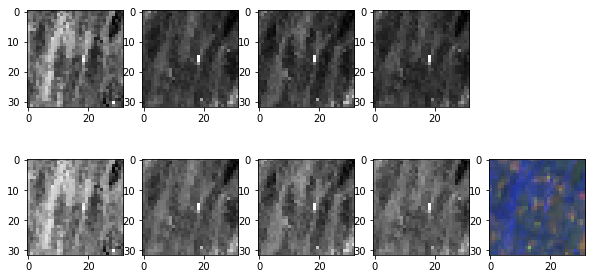

LCZ 9:  Sparsely built


In [519]:
view_data(vali_h5, 198)

In [384]:
np.ndarray([32,32]).reshape(32,32,1).shape

(32, 32, 1)

In [370]:
train_h5['sen1'][0,0,0,:2] , train_h5['sen1'][0,0,0,4] #/ np.linalg.norm(train_h5['sen1'][0,0,0,:2]) 

(array([-0.01378459, -0.08615369]), 0.013846629299223423)